<a href="https://colab.research.google.com/github/Heliwrenaid/ML-network-embeddings/blob/js-dev/Embedding_alg_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
%%capture
%cd drive/MyDrive/GraphEmbedding-master
!python setup.py install
%cd examples
!python deepwalk_wiki.py

In [3]:
%%capture
# GENERAL
import numpy as np
from ge.classify import read_node_label, Classifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import time

# ALGORITHMS 
from ge import DeepWalk
from ge import LINE
from ge import Node2Vec
from ge import SDNE
from ge import Struc2Vec

height = []
bars = []

In [4]:
%%capture
start = time.time()

G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])# Read graph
model = DeepWalk(G,walk_length=10,num_walks=80,workers=1)#init model
model.train(window_size=5,iter=3)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("Deepwalk")

In [5]:
%%capture
start = time.time()

G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = LINE(G,embedding_size=128,order='second') #init model,order can be ['first','second','all']
model.train(batch_size=1024,epochs=50,verbose=2)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("LINE")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
%%capture
start = time.time()
G=nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',
                        create_using = nx.DiGraph(), nodetype = None, data = [('weight', int)])#read graph

model = Node2Vec(G, walk_length = 10, num_walks = 80,p = 0.25, q = 4, workers = 1)#init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors
end = time.time()

height.append(end - start)
bars.append("Node2Vec")

In [6]:
# NIE DZIALA PRZEZ zbyt nowa numpy
# %%capture
# start = time.time()
# G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

# model = SDNE(G,hidden_size=[256,128]) #init model
# model.train(batch_size=3000,epochs=40,verbose=2)# train model
# embeddings = model.get_embeddings()# get embedding vectors
# end = time.time()

# height.append(end - start)
# bars.append("SDNE")

In [8]:
start = time.time()
G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = model = Struc2Vec(G, 10, 80, workers=4, verbose=40, ) #init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("Struc2Vec")

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  5.9min remaining:  5.9min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  6.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   46.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.8min finished


Learning representation...
Learning representation done!


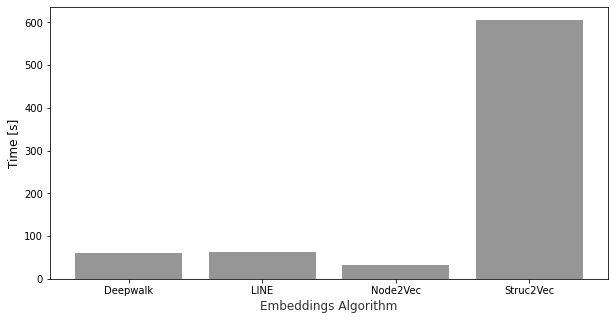

In [9]:
# Make a dataset:
y_pos = np.arange(len(height))
 
#Figsize
plt.figure(figsize=(10,5))
 
# Create bars
plt.bar(y_pos, height, color = '#969696')
  
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Miesiąc', fontsize=12)
plt.ylabel('Wysokość inflacji', fontsize=12)
plt.xlabel('Embeddings Algorithm', fontsize=12, color='#323232')
plt.ylabel('Time [s]', fontsize=12)

plt.show()

In [16]:
!python --version

Python 3.7.13
